## AI기반 챗봇 및 OCR 개발 전문가 과정

### 교과목명 : Vision
- 평가일 : 24. 3. 28
- 성명 :
- 점수 :

fashion_mnist 데이터셋을 불러와서 분류 모델링을 수행한 결과 과적합 발생 및 성능 개선이 필요하다고 판단된다. 아래 사항을 실행하여 과적합 발생과 성능 확인 후 Q1 ~ Q2 문제를 풀어보세요.




4422102/4422102 [==============================] - 1s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


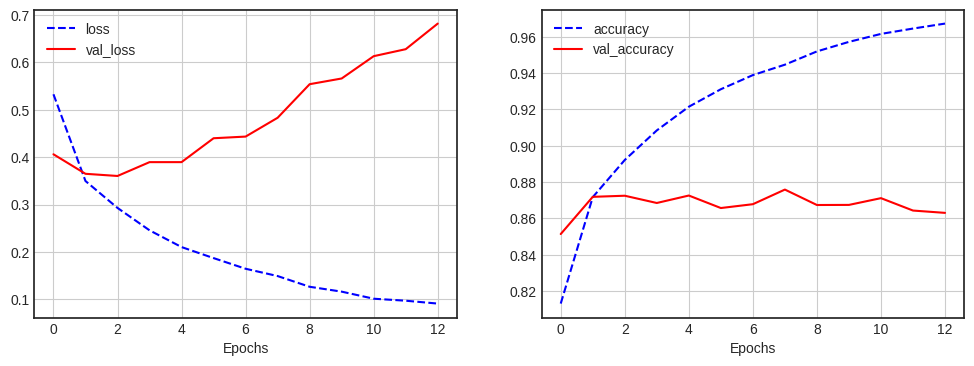

In [1]:
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')
from keras import Model
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout, Conv2D, MaxPooling2D, SpatialDropout2D, Flatten, Reshape, Input
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical
from keras.datasets.fashion_mnist import load_data
from keras.preprocessing.image import ImageDataGenerator

(x_train,y_train),(x_test,y_test) = load_data()
x_train = x_train[...,np.newaxis] # 이미지 데이터에 채널 차원이 명시적으로 없는 경우(예: (28, 28) 크기의 MNIST 이미지) 채널 차원을 추가하기 위해 사용
x_test = x_test[...,np.newaxis]

x_train = x_train/255.
x_test = x_test/255.


class_names = ['T-Shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

# 모델 구성 및 컴파일
def build_model():
  # model=Sequential()
  input = Input(shape=(28,28,1))
  output = Conv2D(filters=32,kernel_size=(3,3))(input)
  output = Conv2D(filters=64,kernel_size=(3,3))(output)
  output = Conv2D(filters=64,kernel_size=(3,3))(output)
  output = Flatten()(output)
  output = Dense(128, activation='relu')(output)
  output = Dense(64, activation='relu')(output)
  output = Dense(10, activation='softmax')(output)

  model = Model(inputs=[input], outputs=output) # 모델이 하나 이상의 입력을 받을 수 있으며 출력은 단일 출력을 함.

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['acc'])
  return model

model_1 = build_model()

# ModelCheckpoint 콜백 설정
model_checkpoint = ModelCheckpoint(
    'best_model.h5', # 모델 파일 경로
    monitor='val_loss', # 모니터링 대상 성능 지표
    verbose=0, # 로그를 출력
    save_best_only=True, # 가장 좋은 모델만 저장
)

# EarlyStopping 콜백 설정
early_stopping = EarlyStopping(
    monitor='val_loss', # 모니터링 대상 성능 지표
    patience=10, # 성능 개선이 없는 에폭을 몇 번까지 허용할지 설정
    verbose=0, # 로그를 출력
)

# 학습 실행
hist_1 = model_1.fit(
    x_train, y_train,
    epochs=40,
    validation_split=0.3,
    batch_size=128,
    verbose=0,
    callbacks=[model_checkpoint, early_stopping] # 콜백 리스트에 추가
)

hist_1.history.keys()
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(hist_1.history['loss'],'b--',label='loss')
plt.plot(hist_1.history['val_loss'],'r',label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist_1.history['acc'],'b--',label='accuracy')
plt.plot(hist_1.history['val_acc'],'r',label='val_accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

In [ ]:
model_1.evaluate(x_test,y_test)

Q1. 상기 모델에서 과적합을 줄이기 위하여 파라미터 수를 감소시키는 모델 구성으로 보완하고 시각화하세요.

Q2. 상기 모델에서 레이어를 추가하여 모델 성능을 개선하세요.

Q3. 사전 훈련된 모델 vgg19를 이용해 dog.jpg 분류 작업을 수행하세요.

In [ ]:
!wget -O dog.jpg https://www.publicdomainpictures.net/pictures/250000/nahled/dog-beagle-portrait.jpg

--2024-03-26 04:21:48--  https://www.publicdomainpictures.net/pictures/250000/nahled/dog-beagle-portrait.jpg
Resolving www.publicdomainpictures.net (www.publicdomainpictures.net)... 104.20.123.60, 172.67.1.236, 104.20.122.60, ...
Connecting to www.publicdomainpictures.net (www.publicdomainpictures.net)|104.20.123.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88498 (86K) [image/jpeg]
Saving to: ‘dog.jpg’

dog.jpg             100%[===================>]  86.42K  --.-KB/s    in 0.006s  

2024-03-26 04:21:49 (13.8 MB/s) - ‘dog.jpg’ saved [88498/88498]



Q4. matplotlib을 이용해서 아래와 같이 웹에서 이미지 파일을 가져와서 출력할 수 있다. 다음 사항을 수행하세요.
- matplotlib 대신에 cv2를 사용하여 이미지를 출력하세요.
- urlretrieve와 cv2.imread를 이용해서 이미지를 읽어와서 출력하세요

<ipython-input-16-9e8b64a1ca47>:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(url)


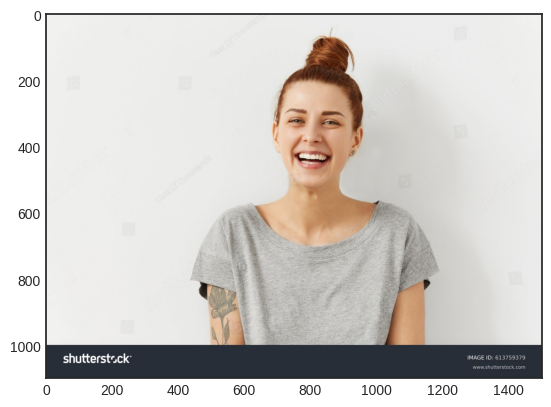

In [ ]:
import imageio
from matplotlib import pyplot as plt

# 이미지 URL
url = 'https://image.shutterstock.com/z/stock-photo-happy-cheerful-young-woman-wearing-her-red-hair-in-bun-rejoicing-at-positive-news-or-birthday-gift-613759379.jpg'

# imageio를 사용하여 URL에서 이미지 직접 로드
img = imageio.imread(url)

# 이미지 표시
plt.imshow(img)
plt.show()

Q5. family.jpg 이미지를 가져와서 정면얼굴 부분만 모자익 처리해서 출력하세요.